# Kickstarter Projects Analysis

This dataset provides detailed insights into Kickstarter projects such as project name, type of category, country of origin and duration of the project. The purpose of this project is to explore the dataset and identify any trends/patterns that may impact delivery performance and present them using visualisations.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/kemical/kickstarter-projects?select=ks-projects-201801.csv). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. Which category has the highest success rate and why?
2. How does the duration of a project affect the outcome of the project?
3. Which year has the highest success rate?
5. How do Kickstarter projects perform in each country?
6. What range of money goals has the highest success?

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


The dataset consists of 378661 rows and 10 unique columns with integer, object and float data types. There are missing values in the 'name' and 'usd_pledged' column.

Here's a quick summary of the columns in the dataset:
- **name**: the name of the Kickstarter project
- **category**: category of project
- **main_category**: main category project 
- **currency**: currency used for project
- **deadline**: date of deadline
- **goal**: amount of money requested
- **launched**: date project was launched
- **pledged**: amount of money donated 
- **state**: status of project 
- **backers**: number of people who donated to project
- **country**: country of project
- **usd_pledged**: conversion in US dollars of the pledged column (conversion done by kickstarter).
- **usd pledge real**: conversion in US dollars of the pledged column (conversion from Fixer.io API).
- **usd goal real**: conversion in US dollars of the goal column (conversion from Fixer.io API).

## Data Cleaning and Preparation

### Converting data types

Firstly, we will convert the `deadline` and `launched` columns to datetime data types.


In [3]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')

### Checking for duplicates

We will check if there are any duplicated rows in our dataset first.

In [4]:
df[df.duplicated()] == True

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


Fortunately, there are no duplicated rows.

## Feature Engineering 

### Timeline

We will create a new column called `days` to represent the number of days each project was live for. 

In [5]:
# Creating new column for number of days of project. 
duration = df.deadline - df.launched
df['days'] = duration.dt.days

In [6]:
df.days.value_counts().sort_values().head(10)

days
16738     1
14866     1
14834     1
14708     1
14760     1
14749     1
14732     1
91       22
78       39
73       46
Name: count, dtype: int64

It seems that there are extremly high values in the column. We will take a look at these rows.

In [7]:
df[df.days > 100]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.00,14866
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.00,14834
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.00,14749
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.00,14760
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00,14732
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.00,14708
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97,16738


It looks like these rows have a launched date of 1970-01-01. We will replace their `day` values with the median value (29 days) and their `launched` date to be 29 days before its `deadline`.

In [8]:
# Replacing day values with appropriate duration
median_days = df.days.median()
df.days = np.where(df['days'] > 1000, median_days, df['days'])

# Replacing launched date 
df.loc[df["launched"] == pd.Timestamp("1970-01-01 01:00:00"), "launched"] = df["deadline"] - pd.Timedelta(days=30)

### State column

The `state` column has 6 unique values; failed, successful, canceled, undefined, live and suspended. 

In [9]:
# Initial state count
df.state.value_counts().reset_index(name = 'Count')

,state,Count
0,failed,197719
1,successful,133956
2,canceled,38779
3,undefined,3562
4,live,2799
5,suspended,1846


We will remove projects with 'live' status since we do not have the relevant information to identify its outcome at the point of this analysis. 

In [10]:
# New Dataframe without 'live' state
df = df[df.state != 'live']

For the 'undefined' projects, we were determine their state by using the 'usd_pledged_real' and 'usd_goal_real'. If the pledged amount is above or equal to the goal, we will label them as 'successful'. Otherwise, they will be labeled as 'failed'.

In [11]:
df[df.state == 'undefined'].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00,44.0
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53,20.0
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00,29.0
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00,23.0
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00,26.0


In [12]:
# Defining new state for 'undefined' projects
df.state = df.apply(lambda row: row["state"].replace('undefined', 'successful') if row['usd_pledged_real'] < row['usd_goal_real'] else 
                   row["state"].replace('undefined', 'failed'), axis = 1)

### Country column

Now, we will look at the `country` column. There is a value named 'N,0"' which could be an error.

In [13]:
# Initial country count
df.country.value_counts().reset_index().head(7)

,country,count
0,US,290887
1,GB,33393
2,CA,14624
3,AU,7769
4,DE,4096
5,"N,0""",3796
6,FR,2887


In [14]:
# Currency used for error country name
error_country = df[df.country == 'N,0"'].currency.value_counts()
error_country

currency
USD    2737
GBP     460
CAD     206
EUR     186
AUD     111
SEK      31
NZD      28
DKK      16
NOK      14
CHF       7
Name: count, dtype: int64

We can identify the country where the project started using the currency used. We will replace the 'N,0"' values with their respective countries. 

In [15]:
# Replacing 'N,0"' with appropriate country
df["country"] = df.apply(lambda row: row["country"].replace('N,0"', row["currency"][:2]) if isinstance(row["country"], str) else row["country"], axis=1)

## Exploratory Data Analysis

### Data Question 1:  Which category has the highest success rate and why?

In [16]:
# Initial state count
state = df.state.value_counts().reset_index(name = 'Count')
state

,state,Count
0,failed,199373
1,successful,135864
2,canceled,38779
3,suspended,1846


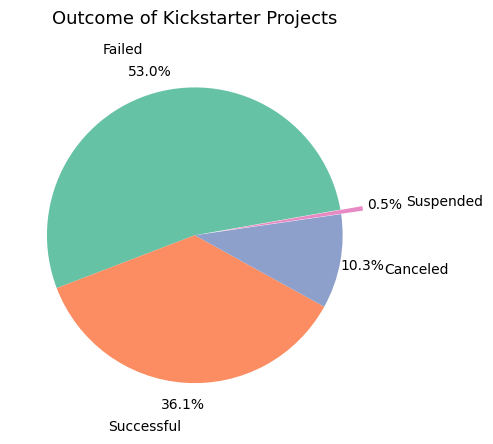

In [17]:
# Plotting pie chart for outcome 
state_labels = ['Failed', 'Successful', 'Canceled', 'Suspended']
plt.pie(x = state.Count, labels = state_labels, autopct = '%1.1f%%', explode = [0,0,0,0.15], pctdistance = 1.15, 
        labeldistance = 1.30, startangle = 10, colors = sns.color_palette("Set2", 5))
plt.title('Outcome of Kickstarter Projects', y = 1.05, fontsize = 13)
plt.show()

More than 50% of Kickstarter projects have failed and 36% of projects have been successful. The remaining 10% of projects were cancelled and a tiny percentage of them were suspended.

In [18]:
# New series for categories and main categories
main_category = df.main_category.value_counts().rename_axis('Main Category').reset_index(name = 'Count')

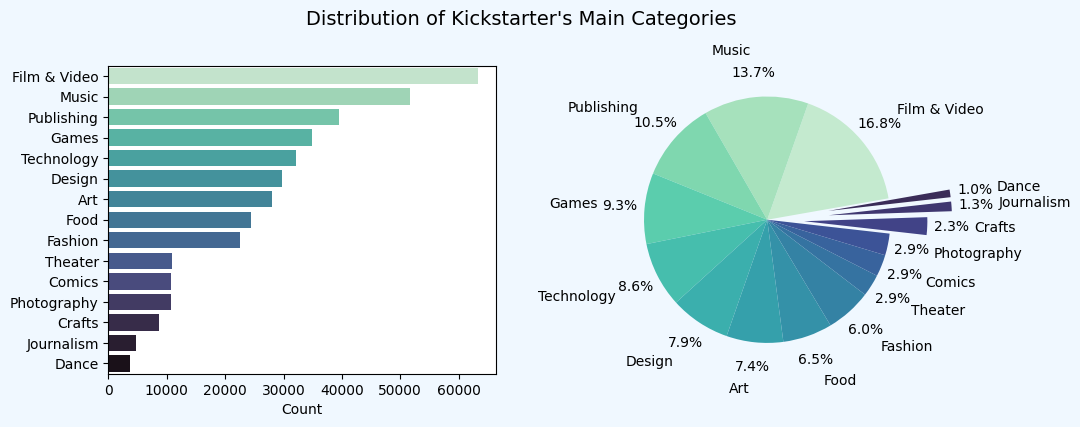

In [19]:
# Plotting bar chart and pie chart for main category
fig = plt.figure(figsize = (11,4), facecolor = 'aliceblue')
plt.suptitle("Distribution of Kickstarter's Main Categories", fontsize = 14, y = 1.02)
plt.subplot(1,2,1)
plt.subplots_adjust(hspace = 2, wspace = 0.2)
sns.barplot(data = main_category, y = 'Main Category', x = 'Count', palette = 'mako_r')
plt.ylabel('Frequency')
plt.ylabel('')

plt.subplot(1,2,2)
plt.pie(x = main_category.Count, labels = main_category['Main Category'], autopct = '%0.1f%%', pctdistance = 1.2, textprops={'fontsize': 10}, 
        colors = sns.color_palette("mako_r", 18), labeldistance = 1.38, explode = [0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.5,0.5], startangle = 10)
plt.show()

Film & Video projects are the most popular category, approximately 17% of all projects followed, by Music and Publishing with 13.7% and 10.5%. The least popular categories and Crafts, Journalism and Dance, less than 3% of projects. 

In [20]:
# New dataframe with successful projects only
successful_projects = df[df["state"] == "successful"]

# Number of successful projects in each main category
success_counts = successful_projects.groupby("main_category")["ID"].count()

# Total number of projects in each main category
total_counts = df.groupby("main_category")["ID"].count()

# Calculating success rate
success_rate = (success_counts / total_counts *100).sort_values(ascending=False).reset_index(name = 'Count')

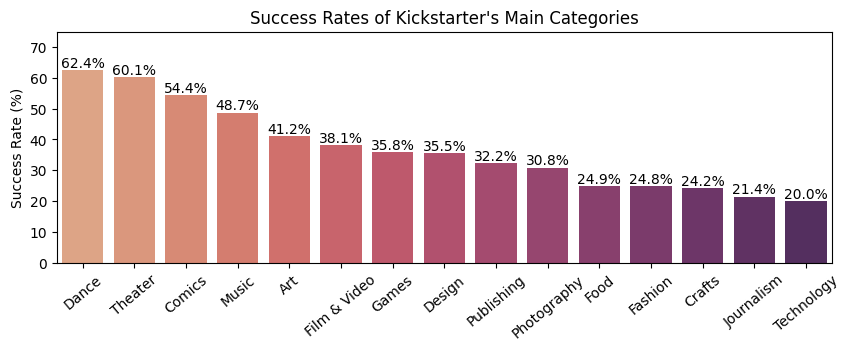

In [21]:
# Plotting bar chart of success rate
fig = plt.figure(figsize = (10,3))
ax = sns.barplot(data = success_rate, x = 'main_category', y = 'Count', palette = 'flare')
plt.title("Success Rates of Kickstarter's Main Categories")
plt.xticks(rotation = 40)
plt.xlabel('')
plt.ylabel('Success Rate (%)')
plt.ylim((0,75))

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=10) # Adding bar labels on top of bars
    
plt.show()

Despite the Dance category to be least popular, it has the highest success rate among all the categories with approximately 62%. Theater projects also have a high success rate of 60% followed by Comics with 54%. Film & Video have a success rate of only 38% despite being the most popular category. Journalism and Technology have the lowest success rate of 21% and 20% respectively.

### Data Question 2: How does the duration of a project affect the outcome of the project?

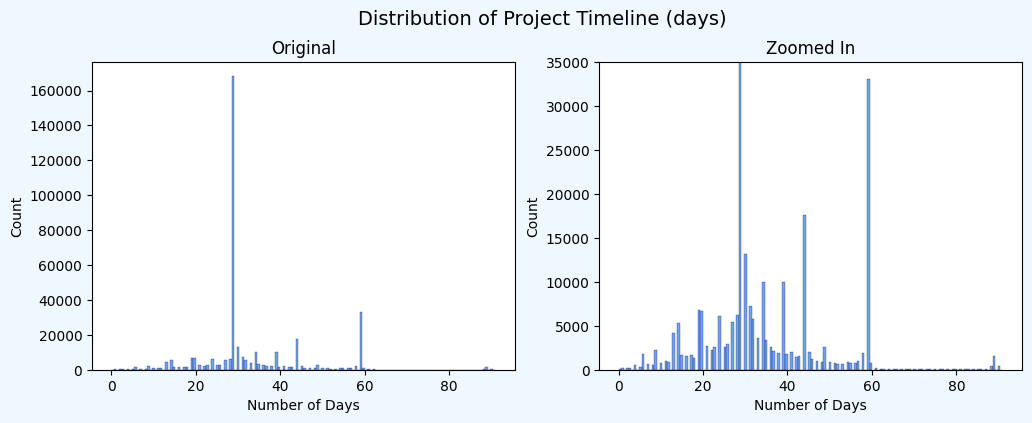

In [22]:
# Plotting histogram of project duration
fig = plt.figure(figsize = (12,4), facecolor = 'aliceblue')
plt.suptitle('Distribution of Project Timeline (days)', y = 1.01, fontsize = 14)
plt.subplot(1,2,1)
sns.histplot(data =df, x='days', bins = 150, color = '#4285F4')
plt.xlabel('Number of Days')
plt.title('Original')

# Zoomed in view
plt.subplot(1,2,2)
sns.histplot(data =df, x='days', bins = 150, color = '#4285F4')
plt.ylim(0,35000)
plt.title('Zoomed In')
plt.xlabel('Number of Days')
plt.show()

The figures above show the frequency of different durations for Kickstarter projects. The histogram increases from 0 days and peaks at approximately 30 days. It has the highest frequency by huge margin with over 160000 projects. The following highest number of days is approximately 59 to 60 days (2 months) with a count of 33000 projects. 

In [23]:
# Binning days into different ranges
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
df['binned_days'] = pd.cut(df.days, bins, labels = ['0 to 9', '10 to 19', '20 to 29', '30 to 39', '40 to 49', 
                                                    '50 to 59', '60 to 69', '70 to 79', '80 to 89', '90 to 99'])

In [24]:
# Dataframe for successful and unsuccessful projects
successful = df[df.state == 'successful']
not_successful = df[df.state != 'succesful']

# Series for successful and unsucessful binned days
success_binned_days = successful.binned_days.value_counts().reset_index(name = 'Count')
failed_binned_days = not_successful.binned_days.value_counts().reset_index(name = 'Count')

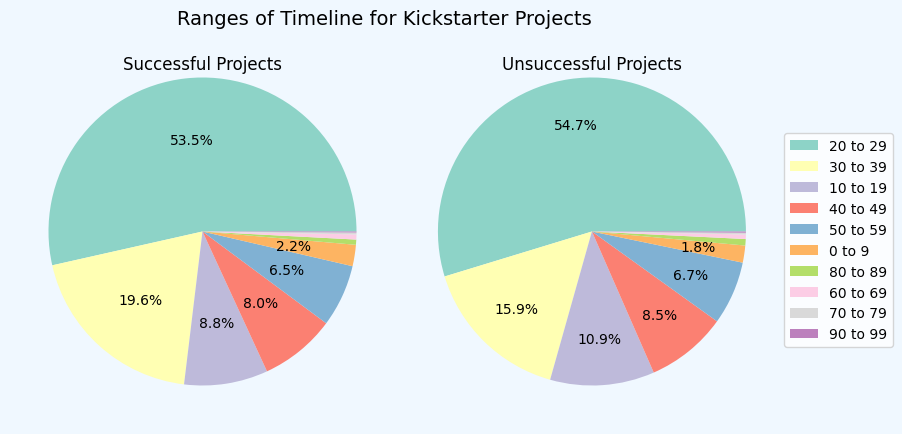

In [25]:
# Plotting bar charts for projects
fig = plt.figure(figsize = (10,5), facecolor = 'aliceblue')
plt.suptitle('Ranges of Timeline for Kickstarter Projects', fontsize = 14,y = 0.94)
plt.subplots_adjust(hspace = 0.1, wspace = 0.01)

# To show specific percentages only 
def autopct(pct): # only show the label when it's > 10%
    return ('%1.1f%%' % pct) if pct > 1 else ''

# Successful projects
plt.subplot(1,2,1)
ax = successful.binned_days.value_counts().plot(kind='pie', subplots = True, autopct=autopct, labels=None, colors = sns.color_palette("Set3", 10))
plt.ylabel('')
plt.title('Successful Projects', y = 0.9)

# Unsuccessful projects
plt.subplot(1,2,2)
ax = not_successful.binned_days.value_counts().plot(kind='pie', subplots = True, autopct=autopct, labels=None, 
                                                    colors = sns.color_palette("Set3", 10), pctdistance = 0.7)
plt.ylabel('')
plt.title('Unsuccessful Projects', y = 0.9)
plt.legend(success_binned_days.binned_days, loc = (1,0.2))

plt.show()

The above bar chart shows the number of projects for different project duration ranges. The proportions seem to be the same for successful and unsuccessful projects. Projects that last between 20 to 29 days or 1 month are the most common, followed by 30 to 39 days (2 months). This trend signifies that number of days does not play a role in the success of a project.

### Data Question 3: When are Kickstarter projects most common in?

In [26]:
# Extracting month from launched date
df['launched_month'] = df.launched.dt.month
projects_month = df.groupby(['launched_month']).count()['ID'].reset_index(name = 'Count')

# Extracting year from launched date
df['launched_year'] = df['launched'].dt.year
projects_year = df.groupby(['launched_year']).count()['ID'].reset_index(name = 'Count')

In [27]:
# New DataFrame for monthly success rate of projects 
successful_months = df[df.state == 'successful'].groupby('launched_month').count()['ID']
total_count_months = df.groupby('launched_month').count()['ID']
success_rate_month = round((successful_months/total_count_months) * 100.0, 2).reset_index(name = 'percentage')

# New DataFrame for yearly success rate of projects 
success_by_year = df[df.state == 'successful'].groupby('launched_year').count()['ID']
total_by_year = df.groupby('launched_year').count().ID
success_rate_year = (success_by_year/total_by_year *100.0).reset_index(name = 'percentage')

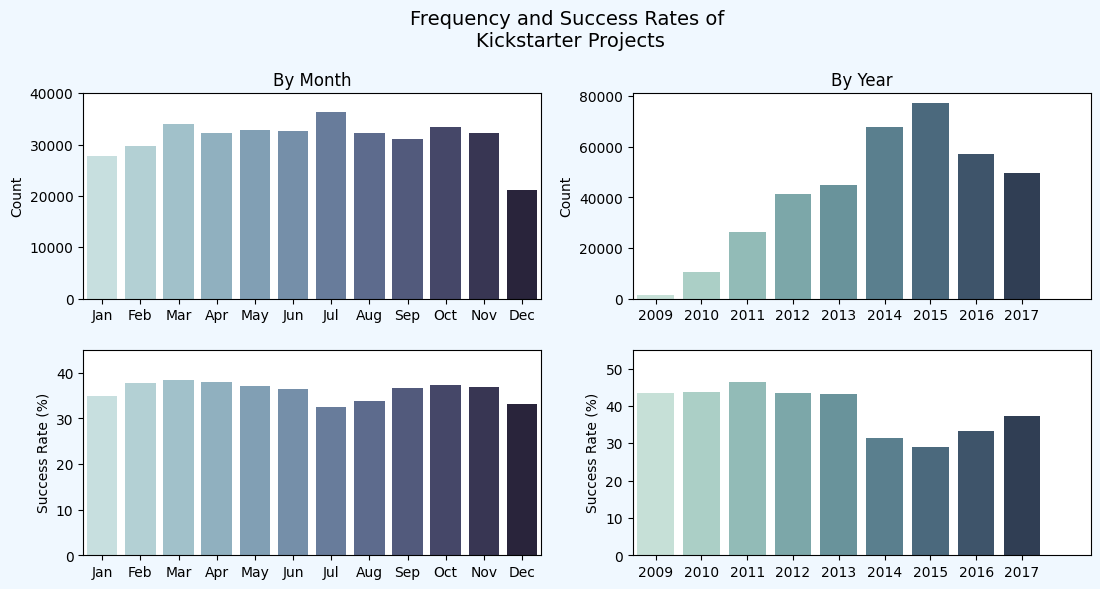

In [28]:
# Plotting barplot for projects per month and year
plt.figure(figsize = (13,6), facecolor = 'aliceblue')
plt.suptitle('Frequency and Success Rates of \nKickstarter Projects', y = 1.02, fontsize = 14)
plt.subplots_adjust(hspace = 0.25)

# Frequency by month
plt.subplot(2,2,1)
sns.barplot(data = projects_month, x = 'launched_month', y = 'Count', palette = sns.color_palette("ch:start=.2,rot=-.3", 12))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.title('By Month')
plt.xlabel('')
plt.xticks(ticks = np.arange(0, 12),labels = months)
plt.ylim(0, 40000)

# Frequency by year
plt.subplot(2,2,2)
sns.barplot(data = projects_year, x = 'launched_year', y = 'Count', palette = sns.color_palette("ch:start=0,rot=-.3", 10))
plt.xticks(np.arange(9), ['2009','2010','2011','2012','2013','2014','2015','2016','2017'])
plt.title('By Year')
plt.xlabel('')

# Success rate by month
plt.subplot(2,2,3)
sns.barplot(data = success_rate_month, x = 'launched_month', y = 'percentage', palette = sns.color_palette("ch:start=.2,rot=-.3", 12))
plt.xticks(ticks = np.arange(0, 12),labels = months)
plt.xlabel('')
plt.ylabel('Success Rate (%)')
# plt.title('By Month')
plt.ylim(0, 45)

# Success rate by year
plt.subplot(2,2,4)
sns.barplot(data = success_rate_year, x = 'launched_year', y = 'percentage', palette = sns.color_palette("ch:start=0,rot=-.3", 10))
plt.xticks(np.arange(9), ['2009','2010','2011','2012','2013','2014','2015','2016','2017'])
plt.xlabel('')
plt.ylabel('Success Rate (%)')
# plt.title('By Year')
plt.ylim(0, 55)
plt.show()

July seems to the most popular month for Kickstarter projects to start with approximately 35000 projects in total, followed by March as a close second. The other months have approximately 28000 to 33000 projects except December with less than 21000 projects. The success rate of projects are between 32% to 38% overall. Despite July having the highest number of projects, it has the lowest success rate. 

Kickstarter was launched in late 2008 and the number of projects continued to grow, peaking in 20145with close to 80000 projects. However, in 2016 and 2017, the number of projects decreased noticeably to around 57000 and 50000 respectively. The success rate of projects were generally high between 2009 and 2013 with an average of 43%. Success rate decreased by 10-15% in 2014 and 2015 but increased slightly in 2016 and 2017. 

### Data Question 4: How do Kickstarter projects perform in each country?

In [39]:
# Initial country count
country_count = df.country.value_counts().reset_index(name = 'Count')

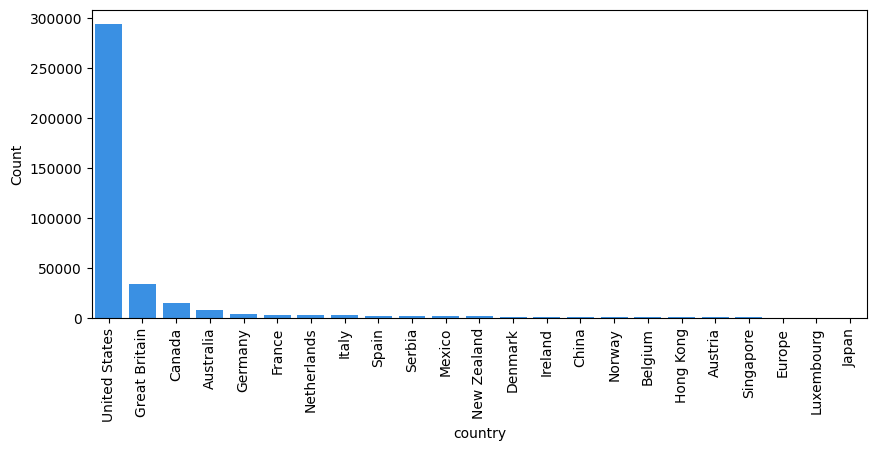

In [59]:
plt.figure(figsize = (10,4))
sns.barplot(data = country_count, x = 'country', y = 'Count', color = 'dodgerblue')
plt.xticks(ticks = range(0,23), labels = ['United States', 'Great Britain', 'Canada', 'Australia', 'Germany', 'France', 'Netherlands', 'Italy', 'Spain', 'Serbia', 'Mexico'
                     , 'New Zealand', 'Denmark', 'Ireland', 'China', 'Norway', 'Belgium', 'Hong Kong', 'Austria', 'Singapore', 'Europe', 
                     'Luxembourg', 'Japan'], rotation = 90)

plt.show()

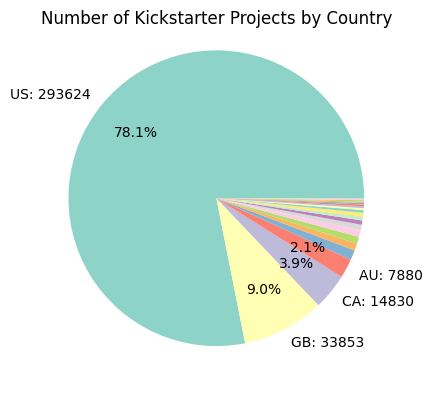

In [110]:
pie_country_labels = [f'{country_count.country[0]}: {country_count.Count[0]}', f'{country_count.country[1]}: {country_count.Count[1]}', 
                      f'{country_count.country[2]}: {country_count.Count[2]}', f'{country_count.country[3]}: {country_count.Count[3]}','','','','','','','','','','','','','','','','','','','']

def autopct(pct): # only show the label when it's > 10%
    return ('%1.1f%%' % pct) if pct > 1.5 else ''

plt.pie(data = country_count, x = 'Count', colors = sns.color_palette("Set3", 23), autopct = autopct, labels = pie_country_labels, pctdistance = 0.7)
plt.title('Number of Kickstarter Projects by Country', y = 0.95)
plt.show()

Most Kickstarter projects are from the United States with over 290000 projects; approximately 78% of projects were from the United States. Great Britain has the second highest number of projects with over 30000 projects followed by Canada and Australia. 

In [32]:
# Number of successful projects in each country
success_countries = successful_projects.groupby('country').count().ID

# Total number of projects in each country
total_projects_countries = df.groupby('country').count().ID

# Success rate in each country
success_rate_country = (success_countries/total_projects_countries * 100.0).reset_index(name = 'percentage').sort_values(by = 'percentage', ascending = False)

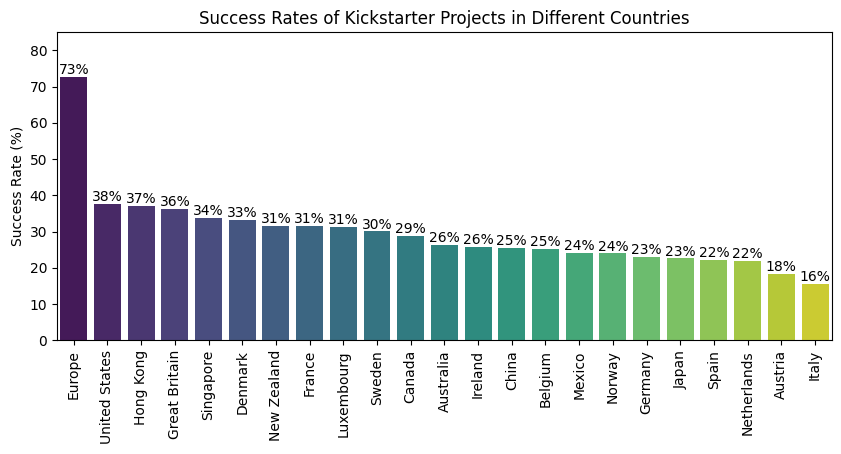

In [33]:
# Country labels
country_full_name = ['Europe', 'United States', 'Hong Kong', 'Great Britain', 'Singapore', 'Denmark', 'New Zealand', 'France', 'Luxembourg', 'Sweden', 
                    'Canada', 'Australia', 'Ireland', 'China', 'Belgium', 'Mexico', 'Norway', 'Germany', 'Japan', 'Spain', 'Netherlands', 'Austria', 'Italy']

# Plotting bar chart for success rate in each country
fig = plt.figure(figsize = (10,4))
ax = sns.barplot(data = success_rate_country, x = country_full_name, y = 'percentage', palette = 'viridis')
plt.xticks(rotation = 90)
plt.ylabel('Success Rate (%)')
plt.title('Success Rates of Kickstarter Projects in Different Countries')
plt.ylim(0,85)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%", fontsize=10)
plt.show()

Kickstarter projects from Europe have the highest success rate with over 70%, followed by the United States and Hong Kong with 38% and 37% respectively. Italy has the lowest success rate with only 16%. 

### Data Question 5: What range of goals has the highest success?

In [111]:
# Data table for different states
median_state = df.groupby(['state']).median(numeric_only =True)
median_state

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,days,launched_month,launched_year
state,,,,,,,,,,
canceled,1.079424e+09,10000.0,88.0,3.0,60.00,87.0,10000.00,29.0,7.0,2015.0
failed,1.073347e+09,7500.0,100.0,3.0,66.00,100.0,7275.00,29.0,7.0,2015.0
successful,1.076602e+09,3900.0,5052.0,69.0,3655.66,5045.0,3828.56,29.0,6.0,2014.0
suspended,1.099296e+09,5000.0,37.0,2.0,25.00,37.0,5000.00,29.0,7.0,2015.0


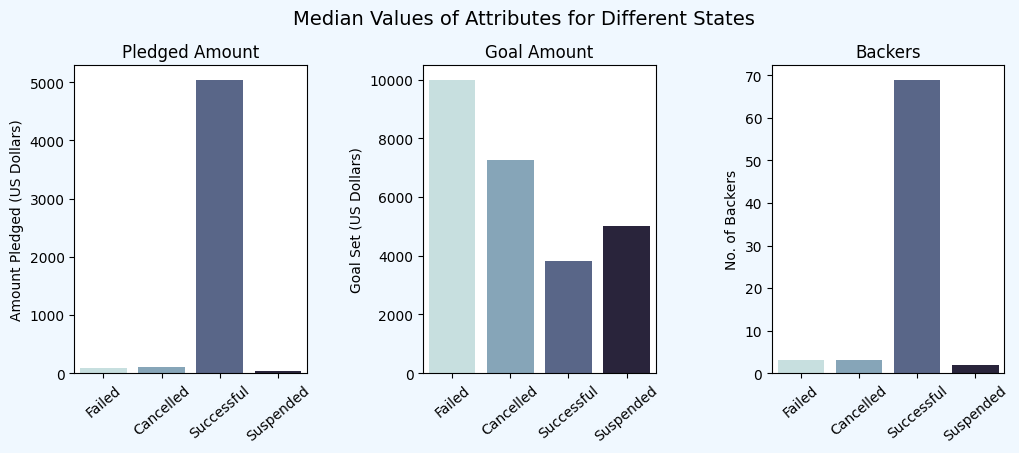

In [112]:
# Plotting bar plot 
fig = plt.figure(figsize = (12,4), facecolor = 'aliceblue')
plt.subplots_adjust(hspace = 0, wspace = 0.5)
state_labels = ['Failed', 'Cancelled', 'Successful', 'Suspended']
plt.suptitle('Median Values of Attributes for Different States', y = 1.02, fontsize = 14)

# Pledged amount
plt.subplot(1,3,1)
sns.barplot(data = median_state, x = state_labels, y = 'usd_pledged_real', estimator = np.median, 
            palette = sns.color_palette("ch:start=.2,rot=-.3", 4))
plt.xlabel('')
plt.xticks(rotation = 40)
plt.ylabel('Amount Pledged (US Dollars)')
plt.title('Pledged Amount')

# Goal amount
plt.subplot(1,3,2)
sns.barplot(data = median_state, x = state_labels, y = 'usd_goal_real', estimator = np.median, palette = sns.color_palette("ch:start=.2,rot=-.3", 4))
plt.ylabel('Goal Set (US Dollars)')
plt.xticks(rotation = 40)
plt.title('Goal Amount')

# Backers
plt.subplot(1,3,3)
sns.barplot(data = median_state, x = state_labels, y = 'backers', estimator = np.median, palette = sns.color_palette("ch:start=.2,rot=-.3", 4))
plt.ylabel('No. of Backers')
plt.xticks(rotation = 40)
plt.title('Backers')
plt.show()

Successful projects have a median goal amount of approximately 4000 dollars whereas failed projects and cancelled projects have a much higher goal with approximately 10000 and 7200 dollars respectively. The pledged amount and number of backers for successful projects are signficantly higher than unsuccessful projects unsurprisingly. 

## Conclusion

This project explores a dataset that contains detailed information on Kickstarter project to identify any trends or patterns and present them using visualisations. Before exploring the data, data cleaning was done on few columns to ensure that there are no errors and of high quality. Next, we performed exploratory data analysis to answer the predetermined questions. Firstly, it was discovered that less than 40% of Kickstarter projects succeed whilst the remaining projects were suspended, cancelled or failed. The most popular category was 'Film & Video', followed by 'Music' and 'Publishing'. However, 'Dance' and 'Theater' have the highest success rate of around 60%. We also found that the duration of a project has no effect on the success rate of the project. In addition to that, we looked at the launch month and year of the projects to compare success rates. The success rates of projects are generally around 30-40% from January to December. The number of projects increases significantly from 2009 to 2015 but decreased from then, however the success rates are approximately 42% from 2009 to 2013 and decreased to 30% in 2015. Next, we discovered that Eurpe